In [1]:
import astropy.constants as const
import astropy.units as u
r=const.R_earth
M=const.M_earth
a=9.80665*u.m/u.s/u.s
G=a*r**2/M
print(G)
G=const.G
print(G)
print(G/const.c**2)

6.679700675470417e-11 m3 / (kg s2)
  Name   = Gravitational constant
  Value  = 6.67408e-11
  Uncertainty  = 3.1e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2014
7.425915486106335e-28 m / kg


* mass can be mesured in meters, mass of earth is 0.004435027574029947 m
* time can be mesaured in meters, sec is equal to 299792458.0 m


In [2]:
G/const.c**2
def kg2m(M_kg):
    return G/const.c**2*M_kg
def sec2m(t_sec):
    return t_sec*const.c
# earth mass in meters
print("地球質量為",kg2m(M))
# sec in meter
print("一秒為",sec2m(1*u.s))

地球質量為 0.004435027574029947 m
一秒為 299792458.0 m


Momenergy conservation can be used to solve collision of two particles when space dimension is one.

Before collision:
$$m_1=8,v_1=15/17,m_2=12,v_2=-5/13,\gamma_1=17/8,\gamma_2=13/12$$

$$ E_1=m_1\gamma_1=17,P_1=m_1\gamma_1v_1=15, E_2=m_2\gamma_2=13, P_2=m_2\gamma_2v_2=-5$$

Total momenergy is $$(17+13,15-5)=(30,10)$$


After collision:
$$m_1'=8, m_2'=12, \gamma_2'=(30-8\gamma_1')/12$$

solve equation of $v_1'$ under condition $\gamma_1'\le 18/8$ :
$$8\gamma_1'v_1'+12v_2'\gamma_2'=10$$

Note: condition $\gamma_1'\le 18/8$  is equivlent to $-\sqrt{65/81}\le v_1'\le \sqrt{65/81}=0.89580641647761661$

In [15]:
import numpy as np
def v2gamma(v):
    return 1/np.sqrt(1-v**2)
def gamma2v(gamma):
    return np.sqrt(1-1/(gamma**2))
def gamma2(gamma1):
    return (30-8*gamma1)/12
def fun(g1):
    g2=gamma2(g1)
    return -8*g1*gamma2v(g1)+12*g2*gamma2v(g2)-10
def fun2(g1):
    g2=gamma2(g1)
    return 8*g1*gamma2v(g1)-12*g2*gamma2v(g2)-10


In [4]:
gamma2v(9/4)

0.89580641647761661

In [35]:
np.sqrt(65/81)

0.89580641647761661

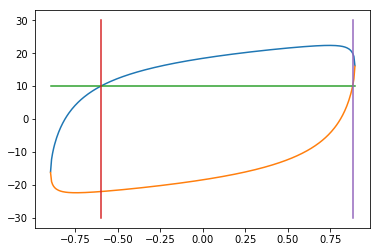

In [33]:
v1=np.linspace(-0.8958,0.8958,300)
g1=[v2gamma(v) for v in v1]
g2=[gamma2(g) for g in g1]
p1=[8*g1[i]*v1[i]+12*g2[i]*gamma2v(g2[i]) for i in range(len(v1))]
p2=[8*g1[i]*v1[i]-12*g2[i]*gamma2v(g2[i]) for i in range(len(v1))]
plt.plot(v1,p1)
plt.plot(v1,p2)
plt.plot([-0.8958,0.8958],[10,10])
plt.plot([-0.6,-0.6],[-30,30])
plt.plot([15/17,15/17],[-30,30])
plt.show()